## Parcial 2 - Analisis Cuantitativo

### Universidad Icesi - Maestria en Ciencia de Datos
#### Profesor: Santiago Ortiz - Henry Velasco

##### Presentado por:

- Melina Ortiz
- Jefferson Rua 
- Daniel Castaño

In [69]:
#### cargamos librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import arange
from scipy.stats import chi2
import scipy.stats as scp

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.covariance import MinCovDet
from sklearn.datasets import load_wine
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import warnings


from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.metrics import mean_squared_error        # Compute mean square error
from sklearn.model_selection import train_test_split   # Splitting dataset into training and test data
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import ttest_1samp

### Punto 3

La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica
datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

In [72]:
### Importamos el dataset desde la libreria sklearn

california_housing = datasets.fetch_california_housing()  ##guardamos el dataset en la varibale "california_housing"

In [73]:
## Descripción general del dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [85]:
## Separamos las variables explicativas X de la variable respuesta Y
X = california_housing.data  # Datos
y = california_housing.target  # Etiquetas

In [6]:
## Convertir los datos en un dataframe de pandas
df = pd.DataFrame(data=X, columns=california_housing.feature_names)

In [7]:
### Revisamos el dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
##verifiquemos la calidad de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


No hay missing values en este dataset

#### EDA

Se realizará un análisis exploratorio de las correlaciones entre las variables. 

In [112]:
# Crear un DataFrame con las variables explicativas
df_X = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Crear un DataFrame con la variable objetivo
df_y = pd.DataFrame(data=california_housing.target, columns=["median_house_value"])

# Concatenar los DataFrames en uno solo para analizar las correlaciones entre las variables
df_combined = pd.concat([df_X, df_y], axis=1)

# Mostrar el DataFrame combinado
df_combined.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [113]:
## creo una matriz de correlación con el dataset combinado
corr = df_combined.corr()

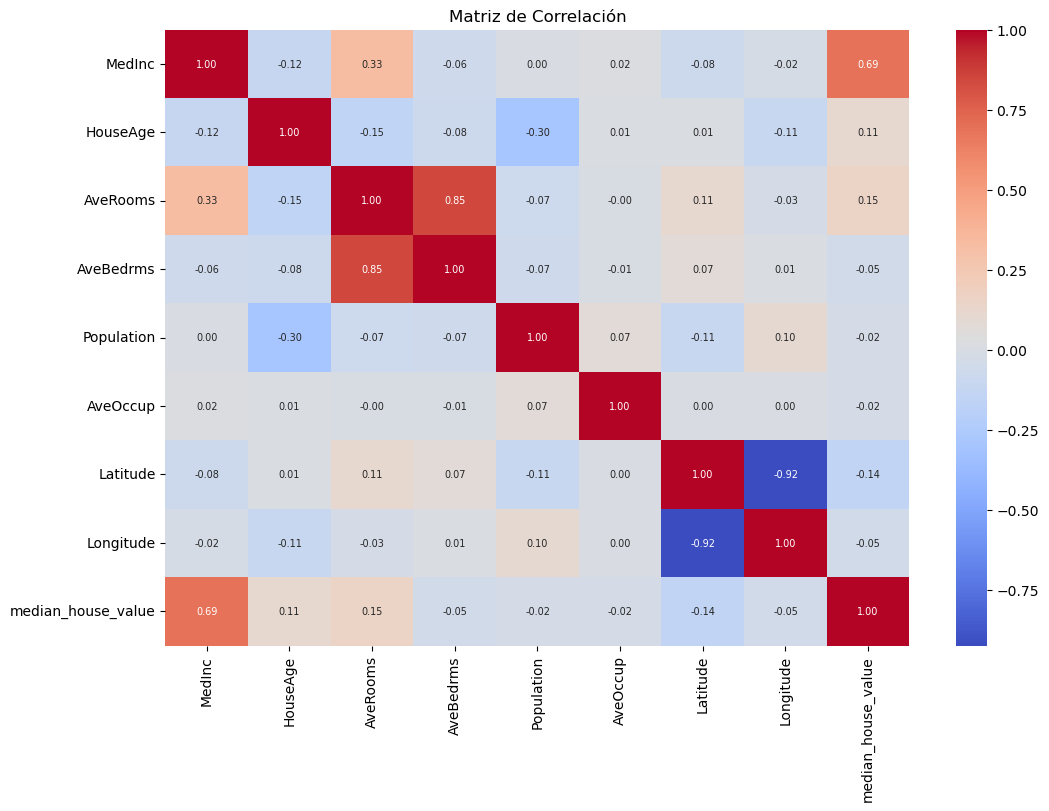

In [114]:
# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", annot_kws={'size': 7}, fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

De acuerdo a los resultados obtenidos en la matriz de correlación, la variable que más multicolinealidad está aportando es la Longitude con la Latitude, es decir, son los que están altamente más correlacionados (-0,92).

Sin embargo, podemos observar también que el número de camas y el número de habitaciones tienen una alta correlación (0,85), esto podría generarnos problemas de condicionamiento. 



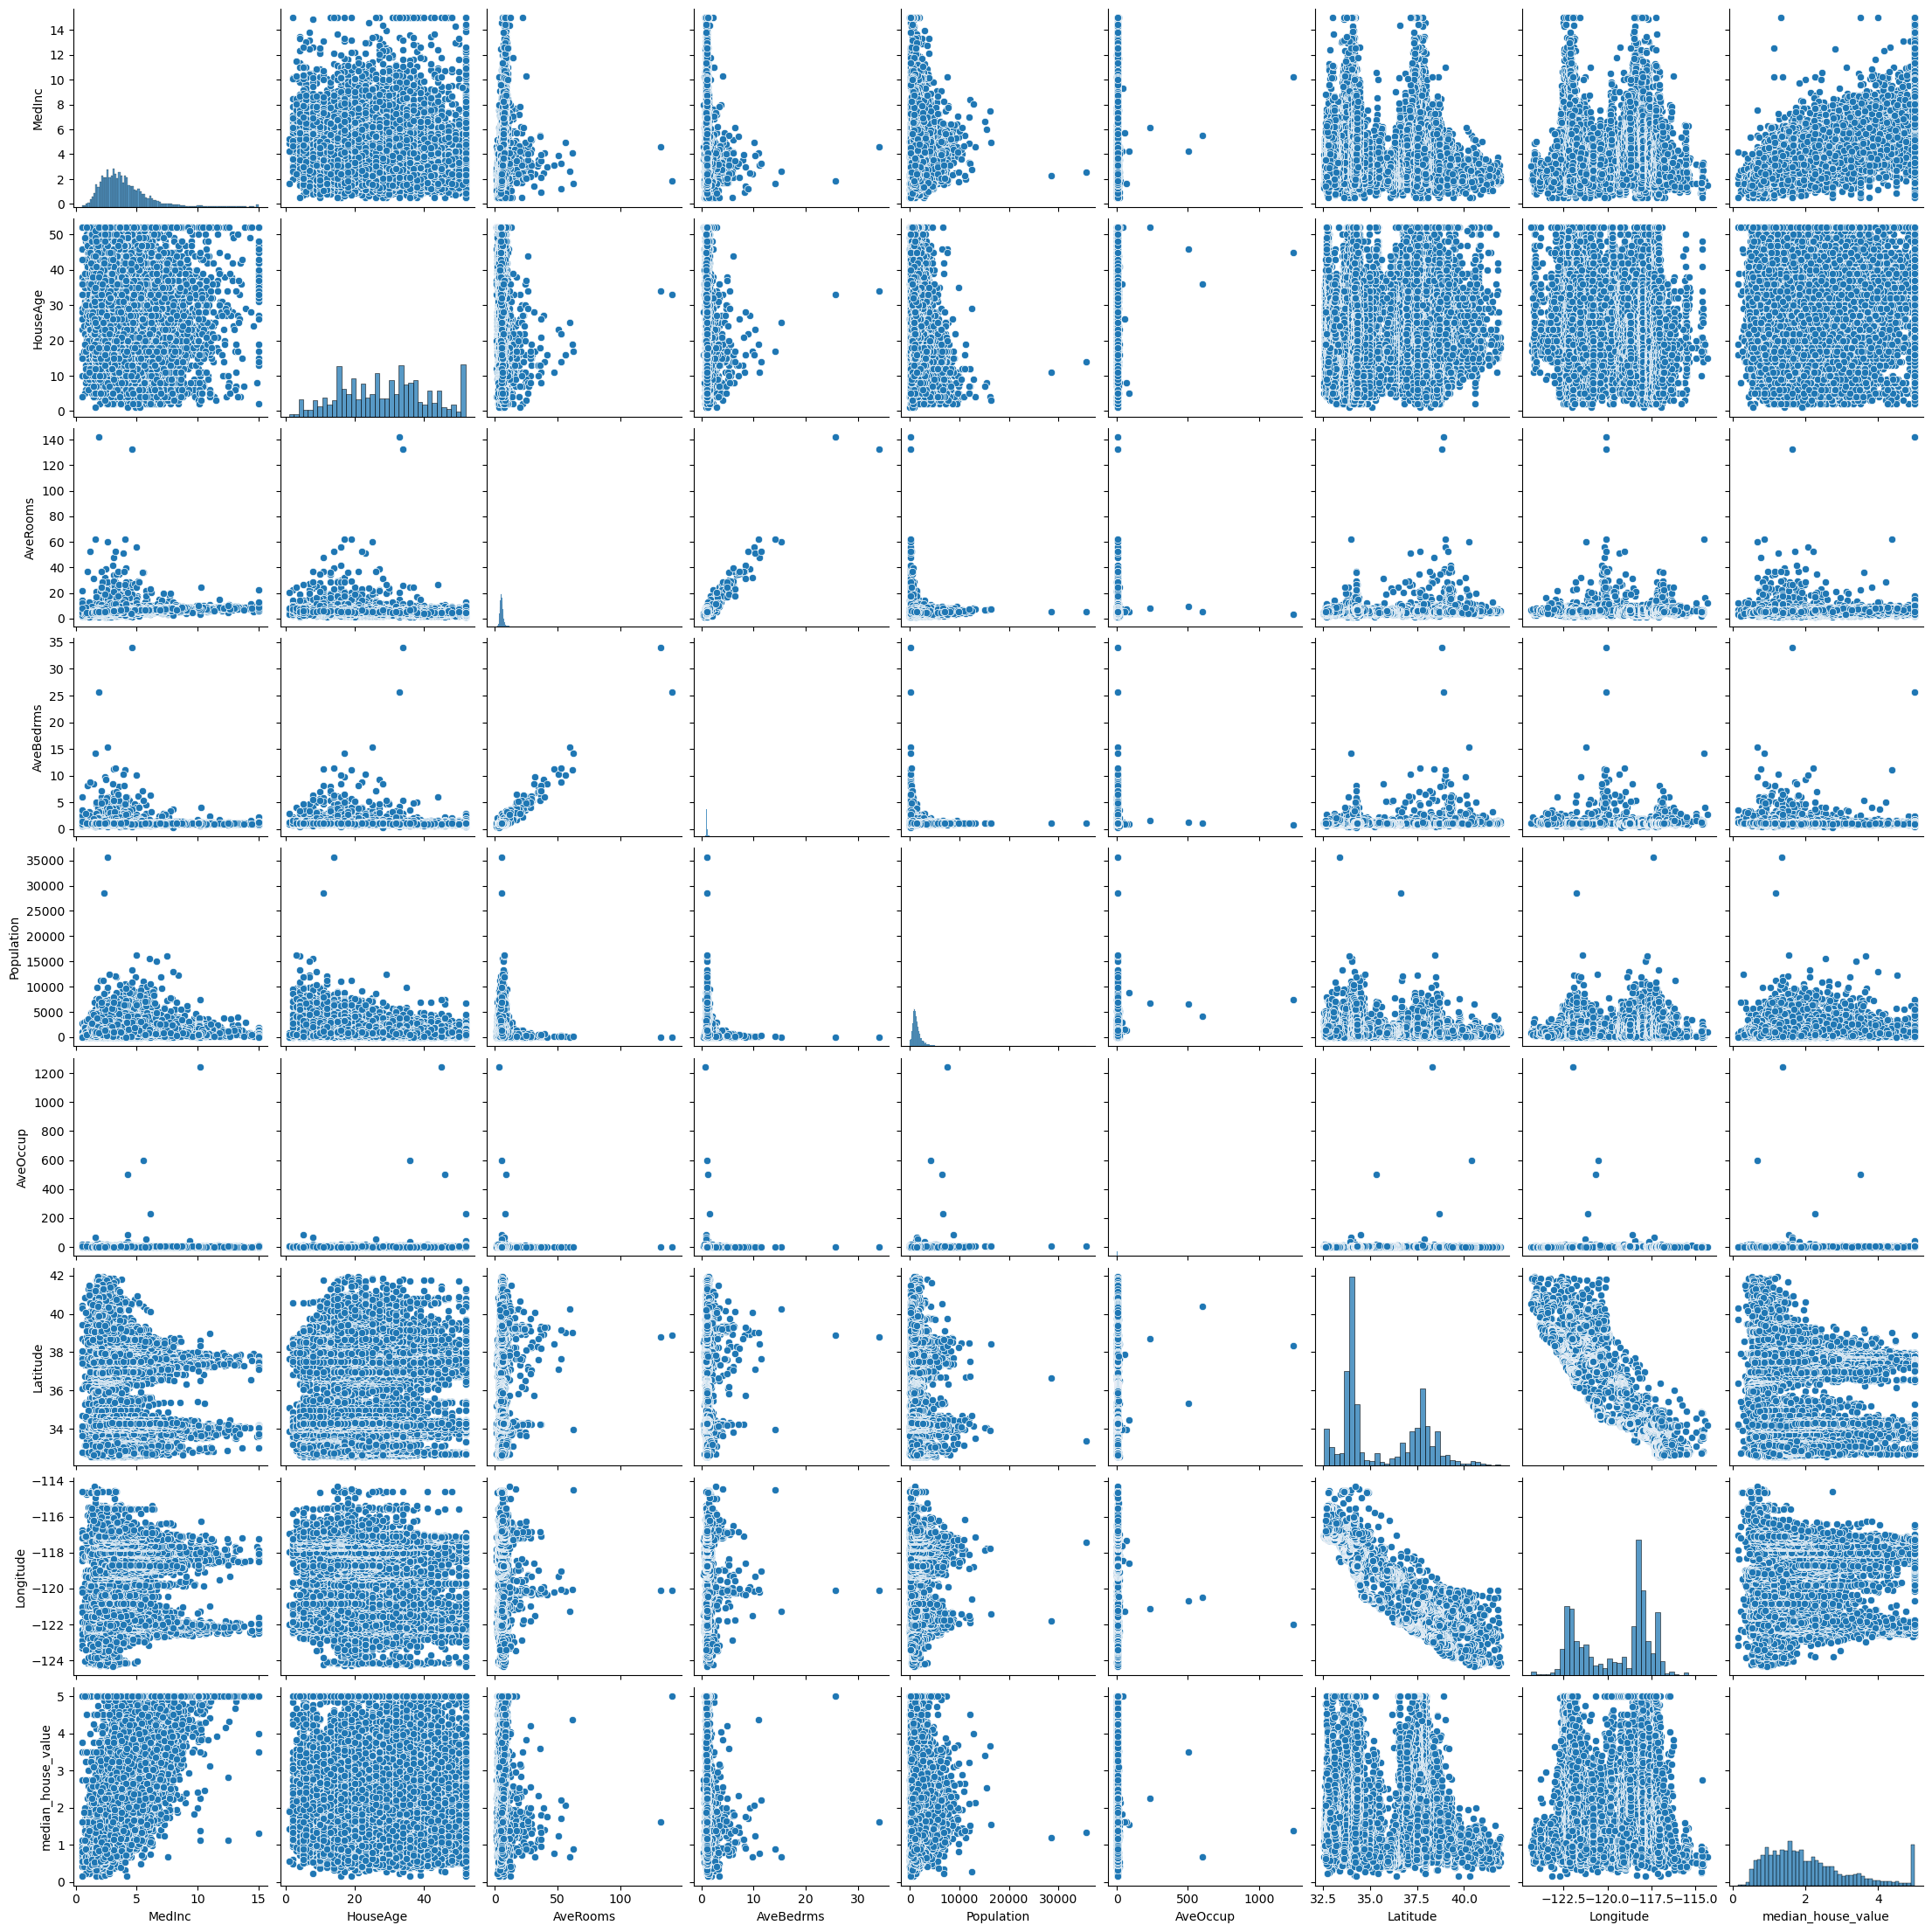

In [13]:
## Hacemos un grafico de dispersión para ver cómo están dispersos los datos 

sns.pairplot( df_combined)

En general los datos se encuentran bastantes dispersos, aquellos que muestran linealidad son el número de habitaciones vs el número de camas. Mientras tanto variables como Longitud y Latitud tienen una correlación bastante fuerte, pero en el caso de hacer un problema de georeferenciación para ver donde están ubicadas las viviendas con valor medio más altos, serían bastante util.
Para efectos de este ejercicio, no vamos a tenerlas en cuenta

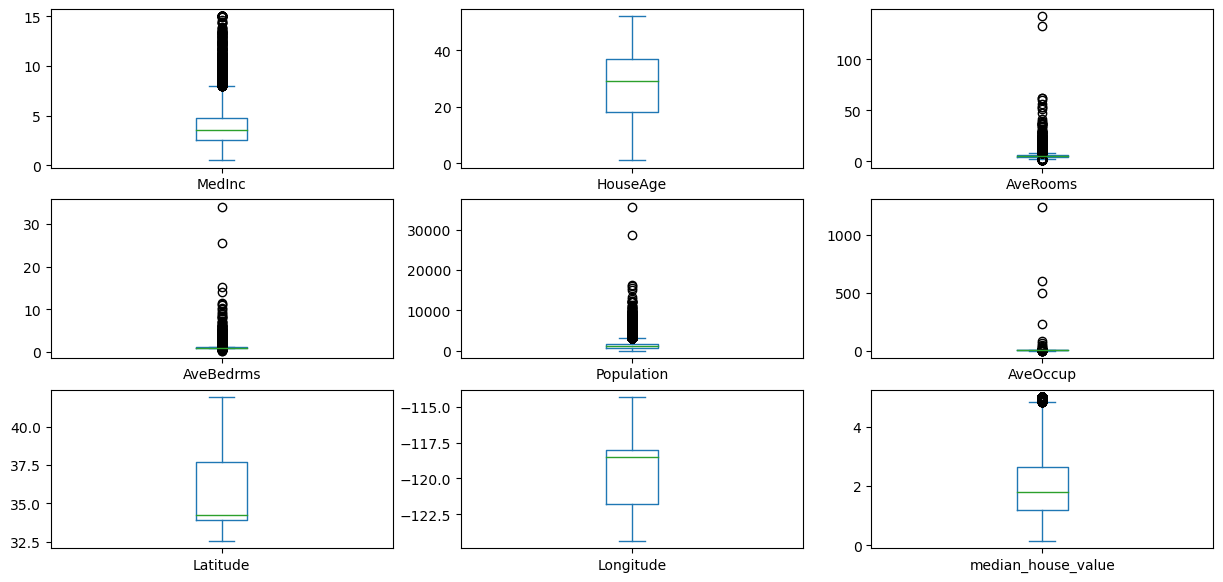

In [14]:
df_combined.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [16]:
# Ocultar todos los mensajes de advertencia
warnings.filterwarnings('ignore')

### Modelos de regresión: 

### Regresión Lineal

Primero realizo el modelo de regresión lineal para verificar que los datos son modelables y sí este cumple con los supuestos

In [88]:
X = df_X.drop(["Longitude", "Latitude"], axis=1)
y = df_y

In [18]:
#### Modelo de regresión 1 #######
x_reg = sm.add_constant(X)
model = sm.OLS(df_y, x_reg)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        22:27:53   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.000      -0.493      -0.385
MedInc         0.5369      0.004    130.183      0.000       0.529       0.545
HouseAge       0.0165      0.000     35.571      0.000       0.016       0.017
AveRooms      -0.2117      0.006    -35.237      0.000      -0.224      -0.200
AveBedrms      0.9937      0.030     33.669      0.000       0.936       1.052
Population  2.211e-05    5.1e-06      4.337      0.000    1.21e-05    3.21e-05
AveOccup      -0.0049      0.001     -9.262      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     4480.630   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16778.766
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       6.883   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De acuerdo a la salida del modelo de regresión lineal, podemos ver que hay un problema de multicolinealidad, se violan supuestos para este modelo

### Regresión LASSO

Modelo de regularización, este modelo me permite hacer un flageo de variables no importantes para el modelo, es una técnica para reducir dimensionalidad hasta cierto punto

In [19]:
from sklearn.linear_model import Lasso, LassoCV

Ajustaremos un modelo de regresión LASSO con un coeficiente de penalización pequeño, iterativamente se irá ajustando este valor para eliminar variables explicativas y corregir el problema de multicolinealidad que encontramos en el modelo OLS anterior, para ello en cada iteración se calculan las correlaciones de las variables explicativas y se para cuando no se encuentren correlaciones altas.

In [100]:
threshold = 0.01  # Umbral para seleccionar características con coeficientes absolutos mayores que el umbral
alphas = np.arange(0.00001, 1, 0.01)  # Valores de alpha para iterar
correlation_matrices = []  # Lista para almacenar las matrices de correlación

# Iterar sobre los valores de alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)  # Inicializar el modelo LASSO con el valor de alpha actual
    lasso.fit(X, y)  # Ajustar el modelo LASSO
    
    coefficients = pd.Series(lasso.coef_, index=X.columns)  # Obtener los coeficientes del modelo LASSO
    selected_features = coefficients[abs(coefficients) > threshold]  # Seleccionar características con coeficientes mayores que el umbral
    correlation_matrix = X[selected_features.index].corr()  # Calcular la matriz de correlación para las características seleccionadas
    correlation_matrices.append(correlation_matrix)  # Agregar la matriz de correlación a la lista

# Iterar sobre los valores de alpha y las matrices de correlación correspondientes
for alpha, correlation_matrix in zip(alphas, correlation_matrices):
    print("Alpha:", alpha)
    print("Matriz de correlación:")
    print(correlation_matrix)
    print("...........................................")

Alpha: 1e-05
Matriz de correlación:
             MedInc  HouseAge  AveRooms  AveBedrms
MedInc     1.000000 -0.119034  0.326895  -0.062040
HouseAge  -0.119034  1.000000 -0.153277  -0.077747
AveRooms   0.326895 -0.153277  1.000000   0.847621
AveBedrms -0.062040 -0.077747  0.847621   1.000000
...........................................
Alpha: 0.01001
Matriz de correlación:
             MedInc  HouseAge  AveRooms  AveBedrms
MedInc     1.000000 -0.119034  0.326895  -0.062040
HouseAge  -0.119034  1.000000 -0.153277  -0.077747
AveRooms   0.326895 -0.153277  1.000000   0.847621
AveBedrms -0.062040 -0.077747  0.847621   1.000000
...........................................
Alpha: 0.02001
Matriz de correlación:
             MedInc  HouseAge  AveRooms  AveBedrms
MedInc     1.000000 -0.119034  0.326895  -0.062040
HouseAge  -0.119034  1.000000 -0.153277  -0.077747
AveRooms   0.326895 -0.153277  1.000000   0.847621
AveBedrms -0.062040 -0.077747  0.847621   1.000000
...................................

**Comentarios:**

- De entrada, encontramos que con un alpha de 0.00001, el modelo me está penalizando las variables "Population y "AveOccup", pues se detectó que sus coeficientes eran igual a cero o muy cercanos

- Una vez se sigue realizando el proceso de forma iterativa, encontramos que con un alpha de 0.03001, se penaliza la variable "AveBedrms", si observamos en la tabla de iteraciones que nos muestra la Matriz de correlación, en particular, esta variable está altamente correlacionada con la variable "AveRooms"

In [103]:
#### Lasso regresion model 1 ##### alpha 0.00001
model_Lasso = Lasso(alpha = 0.00001)

model_Lasso.fit(X,y)

#### Score regression model 1 ##
model_Lasso.score(X,y)

0.5396977308750669

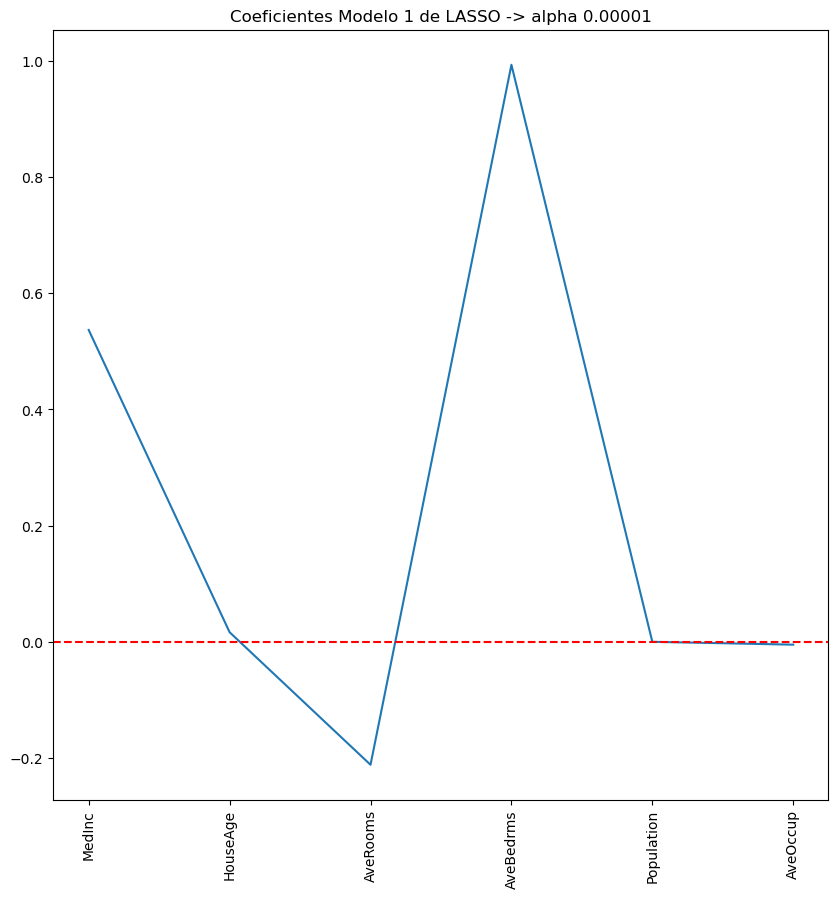

In [108]:
plt.figure(figsize=(10, 10))
plt.plot(X.columns, model_Lasso.coef_)
plt.axhline(y=0, color='red', linestyle='--')  # Línea roja en el cero
plt.xticks(rotation=90)
plt.title("Coeficientes Modelo 1 de LASSO -> alpha 0.00001")  # Título de la gráfica
plt.show()

Si observamos de forma gráfica, con un alpha de 0.00001, vemos que de entrada ya el modelo me está penalizando las variables "Population" y "AveOccup"

In [109]:
###Revisamos ahora qué sucede cuando el alpha 0.03001, según lo que nos sugiere el modelo iterativo
#### Lasso regresion model 2 ##### alpha 0.03001
model_Lasso2 = Lasso(alpha = 0.03001)

model_Lasso2.fit(X,y)

#### Score regression model 2 ##
model_Lasso2.score(X,y)

0.5139566927731892

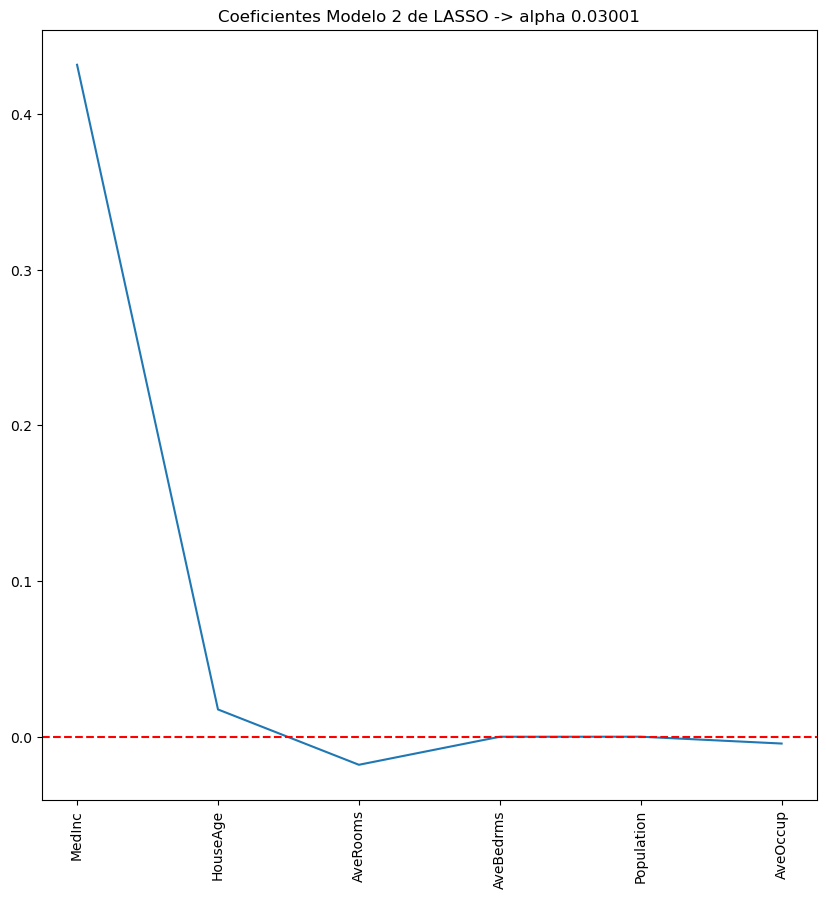

In [110]:
plt.figure(figsize=(10, 10))
plt.plot(X.columns, model_Lasso2.coef_)
plt.axhline(y=0, color='red', linestyle='--')  # Línea roja en el cero
plt.xticks(rotation=90)
plt.title("Coeficientes Modelo 2 de LASSO -> alpha 0.03001")  # Título de la gráfica
plt.show()

- Ahora si, cuando penalizamos con un alpha de 0.03001, podemos ver que las variables "AveOccup", "Population", "AveBedrmms", debemos sacarlas del modelo. Era de esperarse que una variable como "AveBedrms", fuera eliminada, pues tenía una correlación bastante alta con respecto a la variables "AveRooms"

- Vamos ajustar un segundo modelo de regresión por OLS con las variables reducidas para ver si se solucionaron los problemas de multicolinalidad que encontramos en el primero modelo de OLS 



In [116]:
############### Modelo de regressión 2 #################################

x_reg2 = sm.add_constant(X.drop(["Population", "AveOccup", "AveBedrms"], axis=1))
model2 = sm.OLS(df_y, x_reg2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        00:11:33   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.022      0.928      0.353      -0.023       0.063
MedInc         0.4428      0.003    141.292      0.000       0.437       0.449
HouseAge       0.0168      0.000     37.185      0.000       0.016       0.018
AveRooms      -0.0272      0.002    -11.231      0.000      -0.032      -0.022
==============================================================================
Omnibus:                     4387.129   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11558.910
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según los resultados obtenidos en este segundo modelo, el R2 ajustado solo cambió un poco con respecto al modelo de regresión 1 por OLS. Pese a ello, podemos observar que el problema de multicolinealidad desapareció

In [117]:
##Vamos a revisar cómo están los residuos
test = sms.het_breuschpagan(results2.resid, results2.model.exog)
name = ["Lagrange multiplier statistic", "p-value","f-value","f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 635.0391329821903),
 ('p-value', 2.5528597762692573e-137),
 ('f-value', 218.35696381068095),
 ('f p-value', 1.8544524238995726e-139)]

El p valor es menor a 0.05, tenemos problemas de heterocedasticidad

In [118]:
##Accede a los residuos del modelo ajustado utilizando el atributo resid de los resultados

residuales = results2.resid

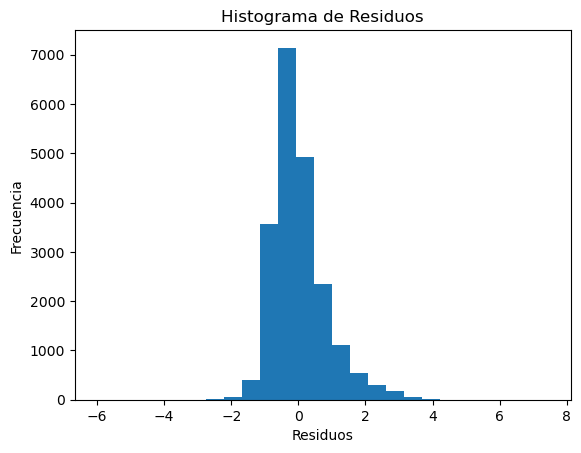

In [119]:
plt.hist(residuales, bins=25)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

Hay problemas de normalidad en los errores, la distribución de los errores es asimétrica

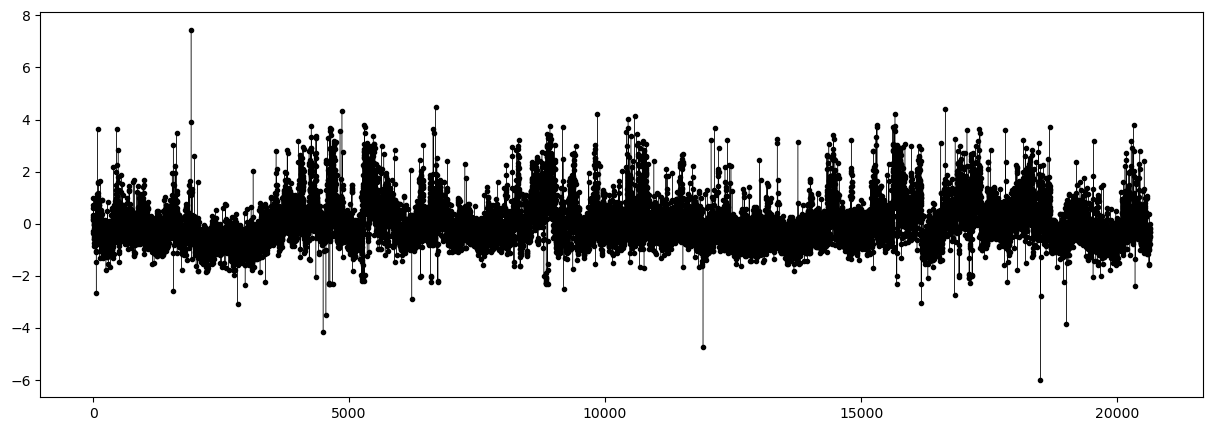

In [120]:
plt.figure(figsize =(15,5))
plt.plot(results2.resid, '.-', color = "black", linewidth = 0.3)

Hay una predominancia de errores muy pequeños con respecto a predominancia de errores con varianza muy alta

**Detección de atípicos utilizando la distancia de Mahalanobis**

In [121]:
########## Version Robusta de Mahalannobis ###########

from sklearn.covariance import MinCovDet
import pandas as pd
import numpy as np
from scipy.stats import chi2


x = df_combined.drop(["Longitude", "Latitude","Population", "AveOccup", "median_house_value", "AveBedrms"], axis=1)
x_menos_mu = x - x.mean()  ### Aquie estamos calculando los datos menos la media

S = MinCovDet().fit(x)  ### Calculando la covarianza de forma Robusta Usando el 
cov = S.covariance_     ### metodo de Minimum Covariance Determinant 
 
inv_cov = np.linalg.inv(cov) ### Invertir matriz de covarianza

left_term = np.dot(x_menos_mu, inv_cov)  #### (x-mean(x)) * S^(-1)
mahal2 = np.dot(left_term, x_menos_mu.T) #### (x-mean(x)) * S^(-1) * x-mean(x))^T
D_h = np.sqrt(mahal2.diagonal())                  #### Sacamos raiz para que me queden las distancias directamente

alpha = 0.01
C = np.sqrt(chi2.ppf(1-alpha, df = x.shape[1]))

print("# de outliers: ", sum(D_h > C))

print(x.loc[D_h > C,]) ## para extraer los puntos que son outliers

# de outliers:  1272
        MedInc  HouseAge  AveRooms
0       8.3252      41.0  6.984127
1       8.3014      21.0  6.238137
2       7.2574      52.0  8.288136
50      0.9218      21.0  2.045662
57      0.8172      52.0  6.102459
...        ...       ...       ...
20426  10.0472      11.0  9.890756
20427   8.6499       4.0  7.236059
20428   8.7288       6.0  8.715842
20436  12.5420      10.0  9.873315
20621   2.3661      37.0  7.923567

[1272 rows x 3 columns]


Utilizando la Version Robusta de Mahalannobis se identificaron 1.272 datos outliers, los cuales vamos a eliminar 

In [122]:
### Creamos un dataset con los datos limpios (sin outliers)
clean = df_combined.drop(["Longitude", "Latitude","Population", "AveOccup", "AveBedrms"], axis=1).loc[D_h <= C, :]
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19368 entries, 3 to 20639
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              19368 non-null  float64
 1   HouseAge            19368 non-null  float64
 2   AveRooms            19368 non-null  float64
 3   median_house_value  19368 non-null  float64
dtypes: float64(4)
memory usage: 756.6 KB


Después de haber eliminado los datos identificados como outliers, vamos ajustar nuevamente el modelo OLS

In [125]:
############### Modelo de regressión OLS 3 #################################

X3 = clean.drop(["median_house_value"], axis=1)
y3 = clean["median_house_value"]

x_reg3 = sm.add_constant(X3)
model3 = sm.OLS(y3, x_reg3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     6087.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        00:15:33   Log-Likelihood:                -22235.
No. Observations:               19368   AIC:                         4.448e+04
Df Residuals:                   19364   BIC:                         4.451e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7442      0.034     22.107      0.000       0.678       0.810
MedInc         0.6119      0.005    120.752      0.000       0.602       0.622
HouseAge       0.0160      0.000     34.993      0.000       0.015       0.017
AveRooms      -0.2825      0.007    -40.017      0.000      -0.296      -0.269
==============================================================================
Omnibus:                     4254.767   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10272.871
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       5.598   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- En esta salida, el valor del R-cuadrado ajustado  es 0.543, lo que indica que el modelo explica el 54.3% de la variabilidad en la variable Y. Esto sugiere que el modelo tiene un ajuste medio

- Mientras tanto, el valor del F-estadístico es 5480, con un valor P muy pequeño, lo que sugiere que el modelo es estadísticamente significativo.

#### Pruebas Estadísticas y visuales para validar hipótesis de los errores

**Jarque-Bera Test:**

- H0: X se distribuye normal
- H1: X no se distribuye normal

Prob(JB) < 0,05, Se rechaza H0 por la tanto se puede decir que X no tiene una distribución Normal

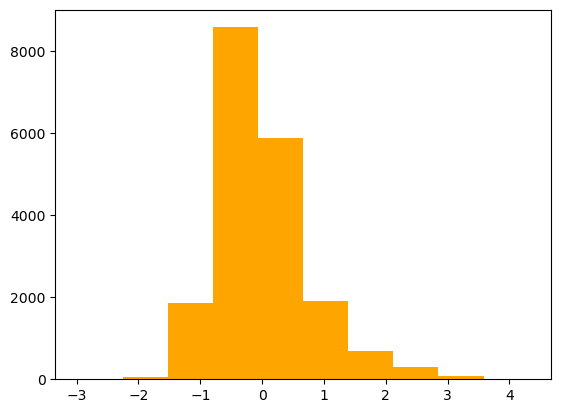

In [124]:
plt.hist(results3.resid, color="orange")
plt.show()

**Durbin-Watson Test:**

H0: cor(e_i, e_i-1)=0 No hay autocorrelación en los errores

H1: cor(e_i, e_i-1)<>0 Hay autocorrelación en los errors si 1.5 <= DW <= 2.5, No rechazo H0, de lo contrario Rechazo H0
DW = 0.896 se rechaza la hipótesis nula de no autocorrelación de los errores. Por lo tanto, podemos asumir que hay autocorrelación en los errores del modelo.

**Breusch Pagan Test:**

In [128]:
### Breush Pagan Test ==> Heterocedasticidad 
test=sms.het_breuschpagan(results3.resid, results3.model.exog)
name=["Lagrange multiplier static", "p-value"," F-Value", "F p-Value" ]
lzip( name, test)

[('Lagrange multiplier static', 354.26140323760376),
 ('p-value', 1.7821180070116273e-76),
 (' F-Value', 120.26247542677831),
 ('F p-Value', 3.586616756985413e-77)]

H0: E_i son homocedasticos

H1: E_i no son homocedasticos (Son heterosedasticos)
Con un valor de p (p-value) muy pequeño, se rechaza la hipótesis nula de homocedasticidad de los errores. Por lo tanto, se puede concluir que hay heterocedasticidad en los errores

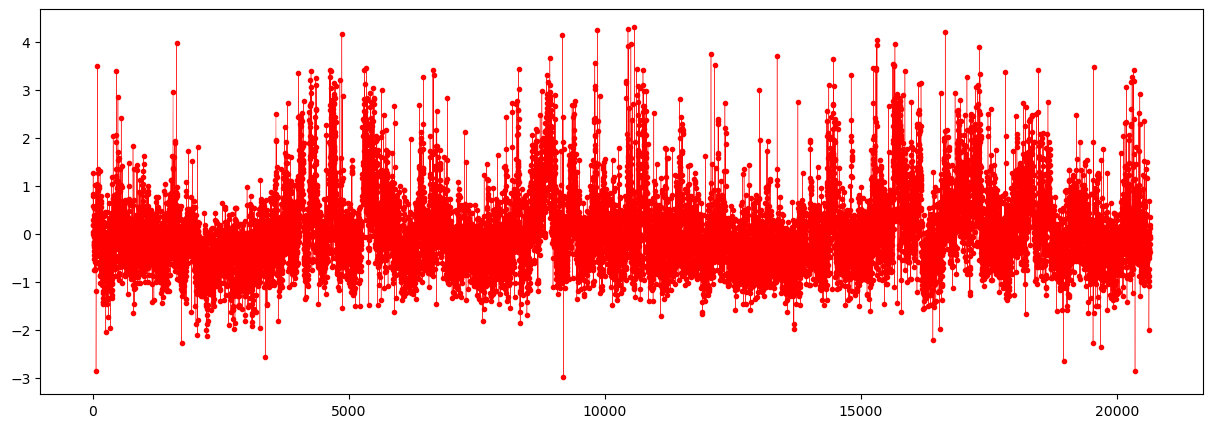

In [129]:
### Distribución de los errores, apoyo visual para corroborar media cero 
### e identificar posibles patrones de dependencia (homocedasticidad) 
plt.figure(figsize=(15,5))
plt.plot(results3.resid, '.-', color ="red", linewidth=0.3)
plt.show()

**Conclusión:**

A pesar de que se realizó una detección de datos atípicos usando la distancia de Mahalanobis y se eliminaron los datos identificados como outliers, el modelo ajustado sigue teniendo problemas como heterocedasticidad, autocorrelación y no normalidad en la distribución de los errores. Sin embargo, con el modelo de LASSO se pudieron penalizar variables que estaban generando multicolinealidad. Para este tipo de datos se recomienda utilizar otro tipo de modelos, pues por medio de todo este proceso, no se logró solucionar los problemas de especificidad del modelo.